# Clustering

In [1]:
# import packages
import pandas as pd
import numpy as np
import math
from nltk import ngrams
from matplotlib import pyplot as plt
import os

In [2]:
# import internal modules
import file_path_management as fpath
import public_library as plib
import parameters as params
import download_and_process_pdf as dpp
import dataframe_columns as df_col

2023-11-14 13:57:57 GM01X680 metapub.config[33070] WARNING NCBI_API_KEY was not set.


## Main program:

In [3]:
# Fit the model to the lower-dimensional data and predict cluster labels
import array


datasets_folder = fpath.datasets_folder

# original_array_name = 'pca_count_list_tak_2'
# original_array_name = 'pca_count_list_tak_3'
# original_array_name = 'pca_count_list_500_2'
# original_array_name = 'pca_count_list_500_3'
# original_array_name = 'pca_count_list_full_text_2'
# original_array_name = 'pca_count_list_full_text_3'
# original_array_name = 'pca_trans_count_list_tak_2'
# original_array_name = 'pca_trans_count_list_tak_3'
# original_array_name = 'pca_trans_count_list_500_2'
# original_array_name = 'pca_trans_count_list_500_3'
original_array_name = 'trans_pca_count_list_full_text_2'
# original_array_name = 'trans_pca_count_list_full_text_3'

array_to_cluster = np.load(os.path.join(datasets_folder, original_array_name+'.npy'))

with open(os.path.join(fpath.datasets_folder, 'count_list_tak_index_list.txt'), 'r') as f:
    count_list_tak_index_list = f.read().splitlines()
    
with open(os.path.join(fpath.datasets_folder, 'count_list_500_index_list.txt'), 'r') as f:
    count_list_500_index_list = f.read().splitlines()
    
with open(os.path.join(fpath.datasets_folder, 'count_list_full_text_index_list.txt'), 'r') as f:
    count_list_full_text_index_list = f.read().splitlines()
    
# index_list = count_list_tak_index_list
# index_list = count_list_500_index_list
index_list = count_list_full_text_index_list

index_list = [int(i) for i in index_list]

print(index_list)
# array_to_cluster = np.load(datasets_folder + original_array_name + '.npy')
# kmeans.fit(array_to_cluster)

[0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 98, 99, 100, 101, 103, 104, 106, 107, 108, 109, 110, 111, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 126, 127, 128, 129, 130, 131, 132, 134, 135, 136, 137, 139, 140, 141, 142, 143, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 181, 182, 183, 184, 185, 186, 187, 188, 190, 191, 192, 193, 195, 196, 197, 198, 199, 200, 202, 203, 204, 205, 206, 207, 208, 210, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 234, 235, 236, 237, 239, 240, 242, 243, 2

In [4]:
# Clustering
from sklearn.cluster import KMeans
# Choose the number of clusters
n_clusters = 2  # Replace with the number of clusters you want to find
# Create a K-Means clustering model
# Apply KMeans Clustering
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(array_to_cluster)
y_kmeans = kmeans.predict(array_to_cluster)

/home/hou/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [5]:
from sklearn.metrics import silhouette_score

# Assume X is your data and labels is the cluster labels from your clustering algorithm
score = silhouette_score(array_to_cluster, y_kmeans)
print("Silhouette Coefficient: %0.3f" % score)

Silhouette Coefficient: 0.437


In [6]:
test_path = fpath.poten_litera_testing_set_1000_labeled
df_test = pd.read_csv(test_path, header=0, sep=',')

yes_index_list = []
test_index_list = []

for ind in df_test.index:
    index = int(df_test.at[ind, 'INDEX'])
    if df_test.at[ind, 'RELEVANT?(Y/N/MB/NA)'] == 'Y':
        yes_index_list.append(index)
    test_index_list.append(index)
        
print(yes_index_list)
print(len(yes_index_list))

test_ind_list = []
relevant_index_list = []
not_relevant_index_list = []

for index in test_index_list:
    if index not in index_list:
        continue
    ind = int(index_list.index(index))
    test_ind_list.append(ind)

for index in yes_index_list:
    if index not in index_list:
        continue
    ind = int(index_list.index(index))
    relevant_index_list.append(ind)
    
for index in test_ind_list:
    if index in relevant_index_list:
        continue
    if index not in relevant_index_list:
        not_relevant_index_list.append(index)
        
print(test_ind_list)   
print(relevant_index_list)
print(len(relevant_index_list))
print(not_relevant_index_list)

[4525, 428, 220, 784, 820, 3625, 941, 4, 377, 1964, 1147, 546, 465, 147, 41, 758, 330, 3683, 100, 476, 1284, 114, 1827, 2703, 1363, 340, 1354, 354, 142, 349, 276, 3027, 33, 182, 49, 313]
36
[8113, 6929, 9285, 2064, 10333, 6278, 9935, 994, 8321, 4930, 1764, 7192, 4077, 561, 9654, 6673, 543, 9335, 3130, 7628, 5309, 555, 4332, 3192, 385, 9376, 765, 1865, 2501, 9129, 2389, 10017, 4710, 6051, 9126, 2035, 9169, 9631, 9462, 338, 199, 2882, 2708, 5857, 4248, 5402, 7333, 6854, 6931, 6263, 8360, 8867, 1407, 2717, 2913, 9574, 9735, 523, 2666, 701, 5901, 3333, 592, 9999, 8457, 8636, 6418, 6683, 4033, 2177, 4634, 8102, 3395, 6956, 7916, 3584, 7393, 604, 3108, 2690, 8137, 5020, 10206, 9099, 6764, 6245, 2487, 8795, 4835, 9819, 7604, 5608, 7872, 7630, 3694, 2157, 7925, 4596, 1518, 1041, 9262, 357, 5189, 3122, 8780, 4599, 2069, 7321, 2052, 7850, 4073, 7707, 9604, 796, 7978, 5340, 2511, 7215, 5282, 1027, 9630, 4499, 2256, 1328, 5073, 8095, 3319, 3977, 9976, 359, 8317, 4103, 2037, 8723, 4058, 6722, 3211,

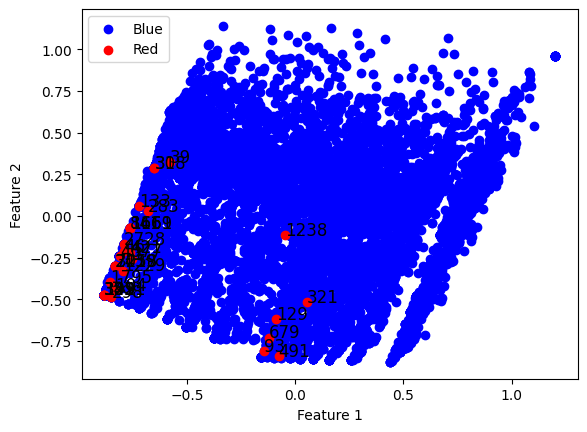

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data (replace with your data)
# data = np.random.rand(100, 2)  # Example 2D data

# Define the indices to label as "red" (replace with your specific indices)
red_indices = relevant_index_list
# Create an array of labels
labels = np.array(['blue'] * len(array_to_cluster))  # Initialize all labels as "blue"
labels[red_indices] = 'red'  # Update labels for the specified indices to "red"

# Separate "red" and "blue" data points
red_data = array_to_cluster[labels == 'red']
blue_data = array_to_cluster[labels == 'blue']


# Visualize the labeled data
plt.scatter(blue_data[:, 0], blue_data[:, 1], c='blue', label='Blue')
plt.scatter(red_data[:, 0], red_data[:, 1], c='red', label='Red')

# Add text annotations for red dots
for i in range(len(red_data)):
    plt.text(red_data[i, 0], red_data[i, 1], str(red_indices[i]), fontsize=12)

plt.legend()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()